In [1]:
import pandas as pd
import numpy as np
import datetime as dt
pd.options.mode.chained_assignment = None

import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

In [118]:
def xgboo(index):
    data = pd.read_csv('Dajiang_processed_20200618.csv')
    # data
    data['Date_Time'] = pd.to_datetime(data['Date_Time'], errors='coerce')
    data['Minute'] = data['Date_Time'].dt.minute
    # data

    # data.loc[data['Date'].isin(['2018/1/1'])]
    data = data.set_index(['Date_Time'])

    if index == 1:
        df1 = data.loc['2018-02-01 00:15:00':'2018-03-01 00:00:00']
        df2 = data.loc['2018-03-01 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-01-01 00:15:00':'2018-02-01 00:00:00']
    if index == 2:
        df1 = data.loc['2018-01-01 00:15:00':'2018-02-01 00:00:00']
        df2 = data.loc['2018-02-22 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-01-25 00:15:00':'2018-03-01 00:00:00']
    if index == 3:
        df1 = data.loc['2018-01-01 00:15:00':'2018-03-01 00:00:00']
        df2 = data.loc['2018-03-25 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-02-22 00:15:00':'2018-04-01 00:00:00']
    if index == 4:
        df1 = data.loc['2018-01-01 00:15:00':'2018-04-01 00:00:00']
        df2 = data.loc['2018-04-24 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-03-25 00:15:00':'2018-05-01 00:00:00']
    if index == 5:
        df1 = data.loc['2018-01-01 00:15:00':'2018-05-01 00:00:00']
        df2 = data.loc['2018-05-25 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-04-24 00:15:00':'2018-06-01 00:00:00']
    if index == 6:
        df1 = data.loc['2018-01-01 00:15:00':'2018-06-01 00:00:00']
        df2 = data.loc['2018-06-24 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-05-25 00:15:00':'2018-07-01 00:00:00']
    if index == 7:
        df1 = data.loc['2018-01-01 00:15:00':'2018-07-01 00:00:00']
        df2 = data.loc['2018-07-25 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-06-24 00:15:00':'2018-08-01 00:00:00']
    if index == 8:
        df1 = data.loc['2018-01-01 00:15:00':'2018-08-01 00:00:00']
        df2 = data.loc['2018-08-25 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-07-25 00:15:00':'2018-09-01 00:00:00']
    if index == 9:
        df1 = data.loc['2018-01-01 00:15:00':'2018-09-01 00:00:00']
        df2 = data.loc['2018-09-24 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-08-25 00:15:00':'2018-10-01 00:00:00']
    if index == 10:
        df1 = data.loc['2018-01-01 00:15:00':'2018-10-01 00:00:00']
        df2 = data.loc['2018-10-25 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-09-24 00:15:00':'2018-11-01 00:00:00']
    if index == 11:
        df1 = data.loc['2018-01-01 00:15:00':'2018-11-01 00:00:00']
        df2 = data.loc['2018-11-24 00:15:00':'2019-01-01 00:00:00']
        df3 = data.loc['2018-10-25 00:15:00':'2018-12-01 00:00:00']
    if index == 12:
        df1 = data.loc['2018-01-01 00:15:00':'2018-10-01 00:00:00']
        df2 = data.loc['2018-10-01 00:15:00':'2018-12-01 00:00:00']
        df3 = data.loc['2018-11-24 00:15:00':'2019-01-01 00:00:00']

    df1_2 = df1[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure']]
    df1_2_forcast = df1[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure', 'Hour', 'Minute']]

    df4_12 = df2[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure']]
    df4_12_forcast = df2[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure', 'Hour', 'Minute']]

    df_3 = df3[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure']]
    df_3_forcast = df3[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure', 'Hour', 'Minute']]

    #normalization
    dfs_max = 515.6
    normalized_dfs1_2 = df1_2 / dfs_max
    nor_df1_2_forcast = df1_2_forcast / dfs_max

    normalized_df4_12 = df4_12 / dfs_max
    nor_df4_12_forcast = df4_12_forcast / dfs_max

    normalized_df_3 = df_3 / dfs_max
    nor_df_3_forcast = df_3_forcast / dfs_max

    dfs_X1 = nor_df1_2_forcast[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Hour', 'Minute']]
    dfs_y1 = nor_df1_2_forcast[['Measure']]

    dfs_X2 = nor_df4_12_forcast[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Hour', 'Minute']]
    dfs_y2 = nor_df4_12_forcast[['Measure']]

    dfs_TX = nor_df_3_forcast[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Hour', 'Minute']]
    dfs_Ty = nor_df_3_forcast[['Measure']]

    normalized_dfs1_2 = normalized_dfs1_2.reset_index(drop=True)
    normalized_df4_12 = normalized_df4_12.reset_index(drop=True)
    normalized_df_3 = normalized_df_3.reset_index(drop=True)

    dfs_X1 = dfs_X1.reset_index(drop=True)
    dfs_y1 = dfs_y1.reset_index(drop=True)

    dfs_X2 = dfs_X2.reset_index(drop=True)
    dfs_y2 = dfs_y2.reset_index(drop=True)

    dfs_TX = dfs_TX.reset_index(drop=True)
    dfs_Ty = dfs_Ty.reset_index(drop=True)

    X1 = []
    end = len(normalized_dfs1_2)-672
    for i in range(0,end,96):
        period_7 = normalized_dfs1_2.iloc[i:672+i, :].to_numpy()
        forcast_info = dfs_X1.iloc[671+i:767+i, :].to_numpy()

        period_7_2d = np.reshape(period_7, (-1))
        forcast_info_2d = np.reshape(forcast_info, (-1))

        r = np.concatenate([period_7_2d, forcast_info_2d])
        X1.append(r.flatten())

    X1 = np.array(X1)

    X2 = []
    end = len(normalized_df4_12)-672
    for i in range(0,end,96):
        period_7 = normalized_df4_12.iloc[i:672+i, :].to_numpy()
        forcast_info = dfs_X2.iloc[671+i:767+i, :].to_numpy()

        period_7_2d = np.reshape(period_7, (-1))
        forcast_info_2d = np.reshape(forcast_info, (-1))

        r = np.concatenate([period_7_2d, forcast_info_2d])
        X2.append(r.flatten())

    X2 = np.array(X2)

    X = np.concatenate([X1, X2])

    y1 = []
    end = len(normalized_dfs1_2)-672
    for i in range(0,end,96):
        forcast_info = dfs_y1.iloc[671+i:767+i, :].to_numpy()

        forcast_info_2d = np.reshape(forcast_info, (-1))

        y1.append(forcast_info_2d.flatten())

    y1 = np.array(y1)

    y2 = []
    end = len(normalized_df4_12)-672
    for i in range(0,end,96):
        forcast_info = dfs_y2.iloc[671+i:767+i, :].to_numpy()

        forcast_info_2d = np.reshape(forcast_info, (-1))

        y2.append(forcast_info_2d.flatten())

    y2 = np.array(y2)

    y = np.concatenate([y1, y2])

    TX = []
    end = len(normalized_df_3)-672
    for i in range(0,end,96):
        period_7 = normalized_df_3.iloc[i:672+i, :].to_numpy()
        forcast_info = dfs_TX.iloc[671+i:767+i, :].to_numpy()

        period_7_2d = np.reshape(period_7, (-1))
        forcast_info_2d = np.reshape(forcast_info, (-1))

        r = np.concatenate([period_7_2d, forcast_info_2d])
        TX.append(r.flatten())

    TX = np.array(TX)

    Ty = []
    end = len(normalized_df_3)-672
    for i in range(0,end,96):
        forcast_info = dfs_Ty.iloc[671+i:767+i, :].to_numpy()

        forcast_info_2d = np.reshape(forcast_info, (-1))

        Ty.append(forcast_info_2d.flatten())

    Ty = np.array(Ty)

    X_train = X
    y_train = y

    X_test = TX
    y_test = Ty

    xg_reg = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:squarederror', booster = 'gblinear',
                              reg_lambda = 0.000001, learning_rate = 0.008, n_estimators = 1250))

    xg_reg.fit(X_train,y_train)

    preds = xg_reg.predict(X_test)

    y_test = y_test * dfs_max
    preds = preds * dfs_max
    
#     print(index,'月')
    rmse = np.sqrt(mean_squared_error(y_test, preds))
#     print("RMSE: %f" % (rmse))
    mape = np.mean(np.abs((preds - y_test) / y_test)) * 100
#     print("MAPE: %f" % (mape))
    
    y_test = y_test.flatten()
    preds = preds.flatten()
    
    return rmse, mape, y_test, preds

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

1 月
RMSE: 19.208723
MAPE: 7.565820


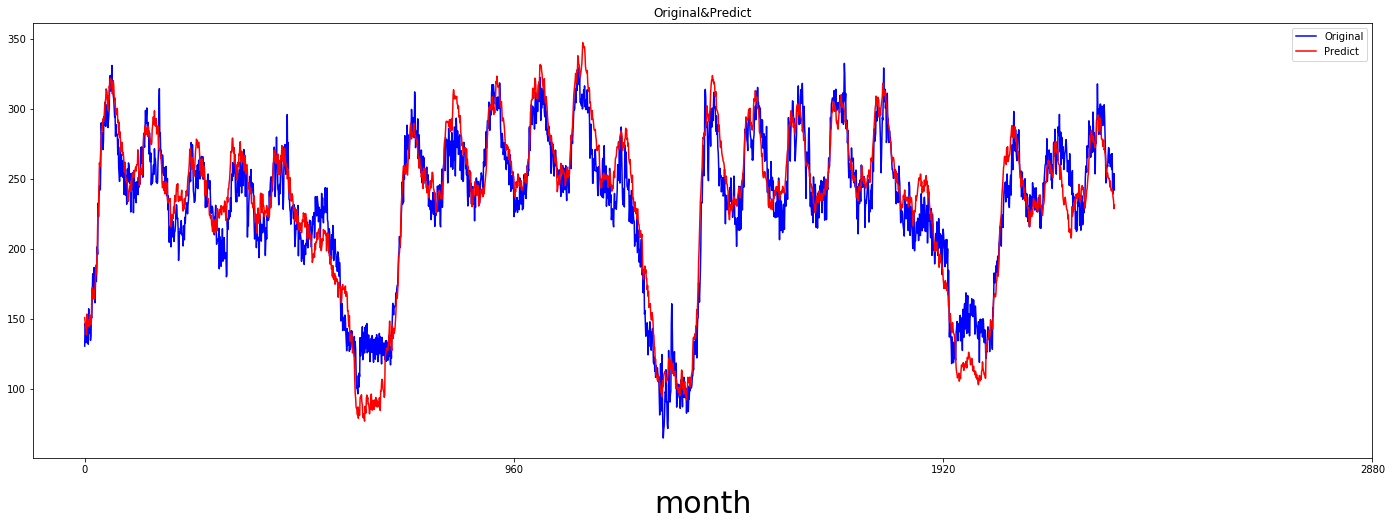

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

2 月
RMSE: 25.594991
MAPE: 11.243157


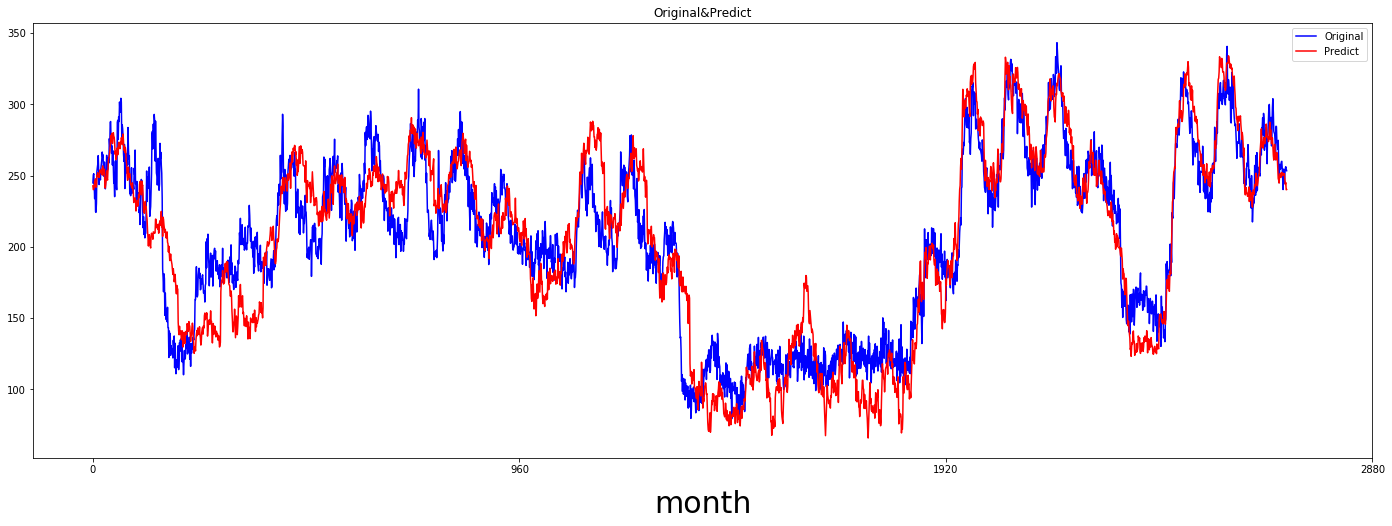

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

3 月
RMSE: 21.598338
MAPE: 6.869010


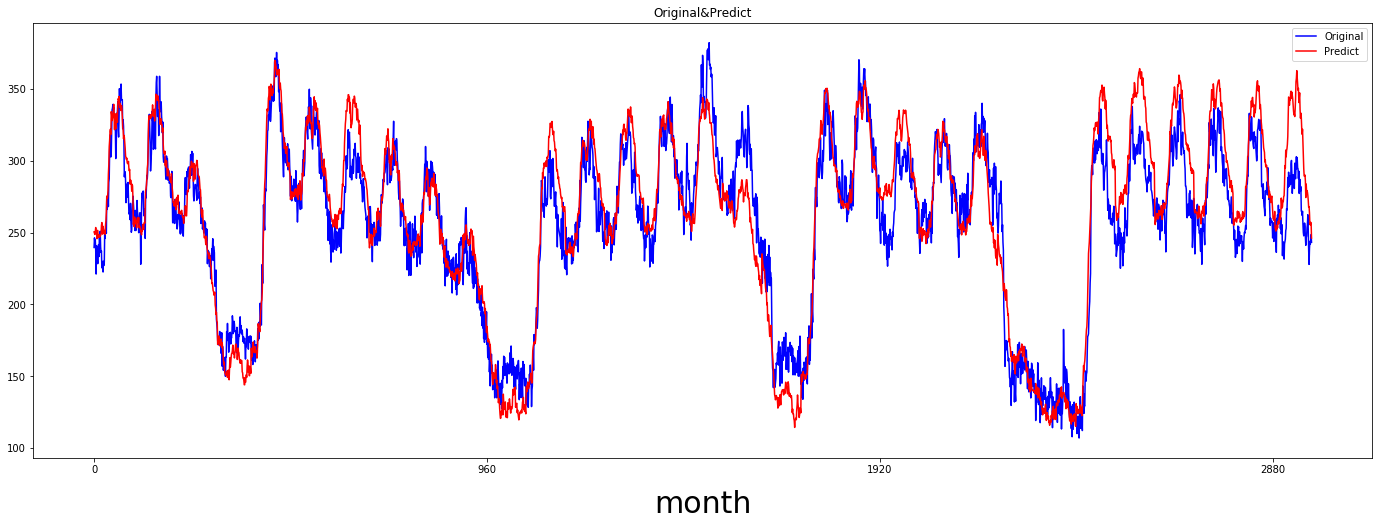

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

4 月
RMSE: 24.658890
MAPE: 8.391355


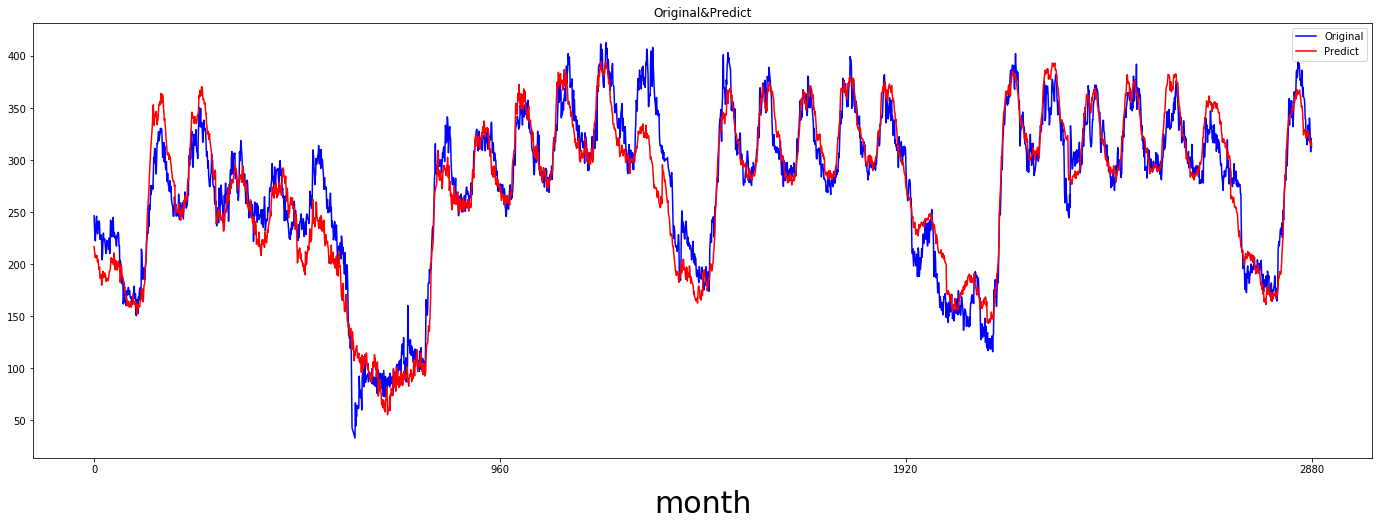

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

5 月
RMSE: 20.771181
MAPE: 5.580561


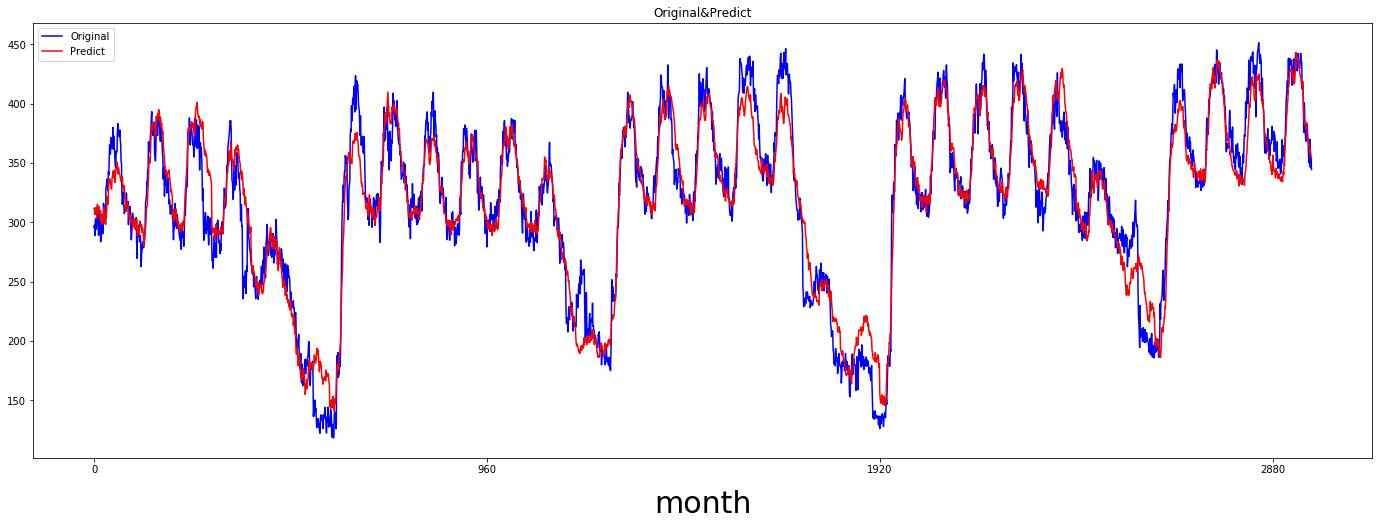

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

6 月
RMSE: 20.252182
MAPE: 5.181977


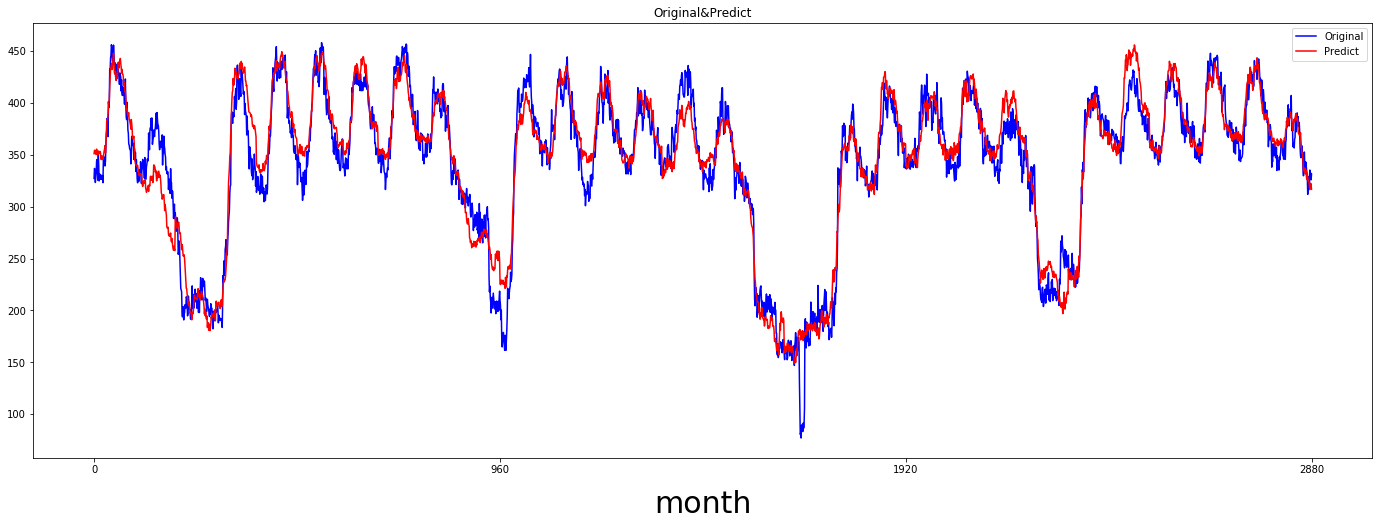

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

7 月
RMSE: 19.828083
MAPE: 4.539878


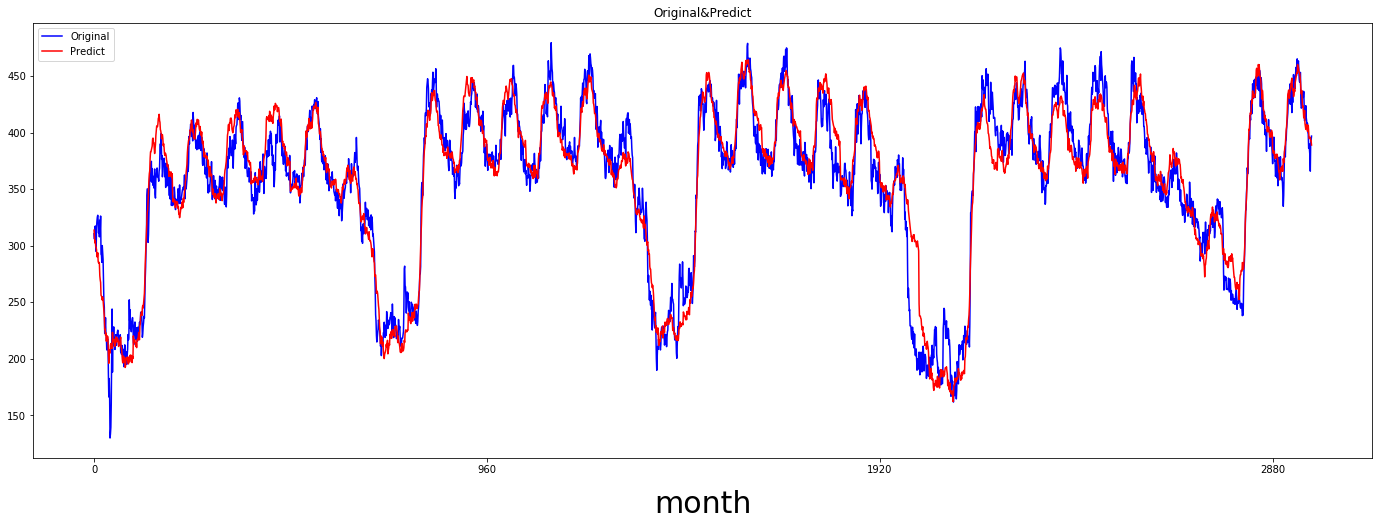

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

8 月
RMSE: 23.659869
MAPE: 5.908864


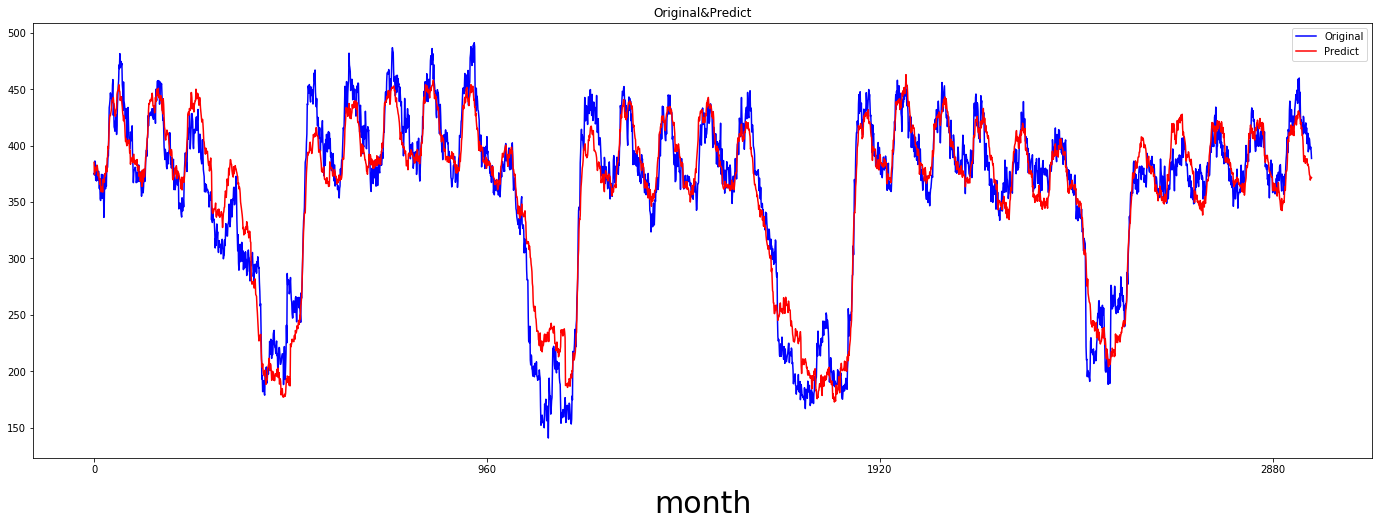

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

9 月
RMSE: 33.879078
MAPE: 8.779338


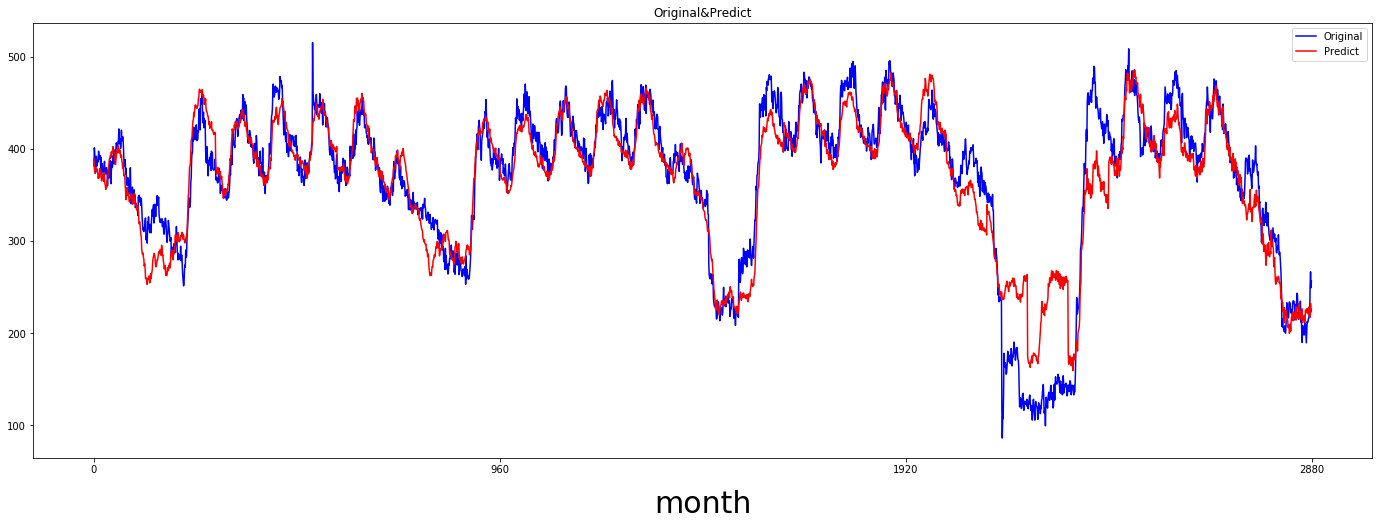

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

10 月
RMSE: 25.501737
MAPE: 5.927748


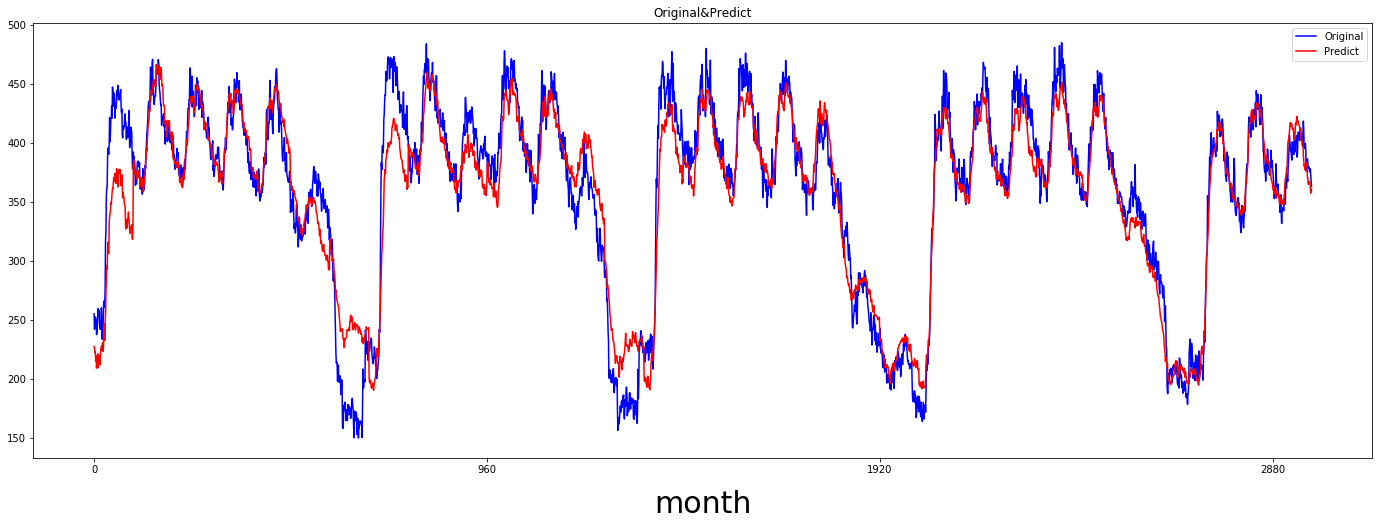

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

11 月
RMSE: 17.831356
MAPE: 4.258811


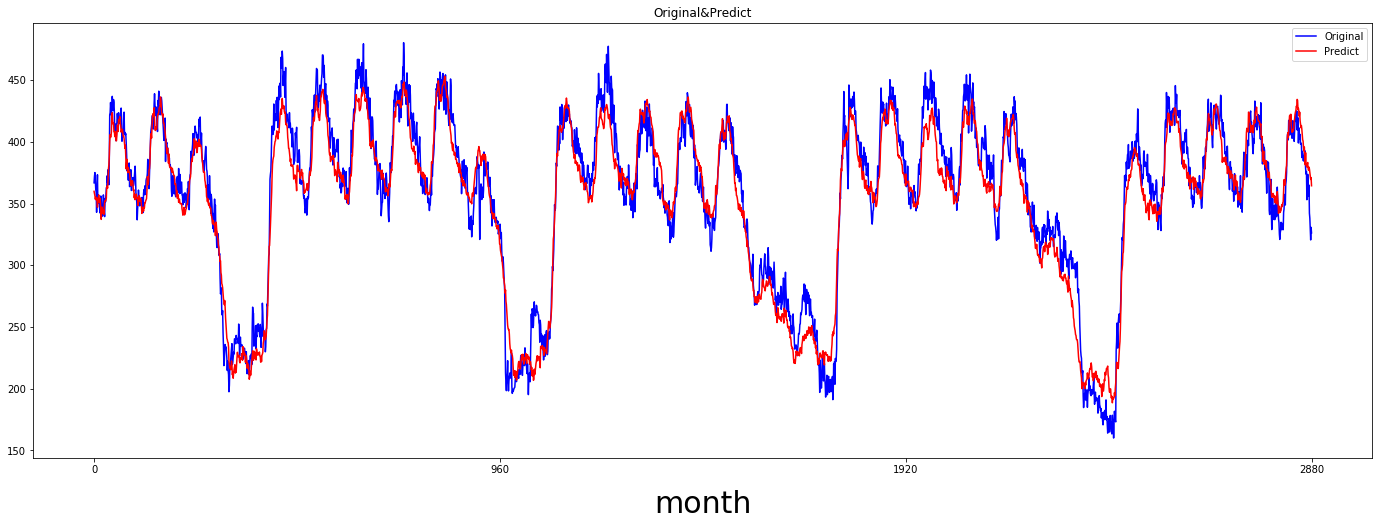

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because

12 月
RMSE: 28.522548
MAPE: 10.657682


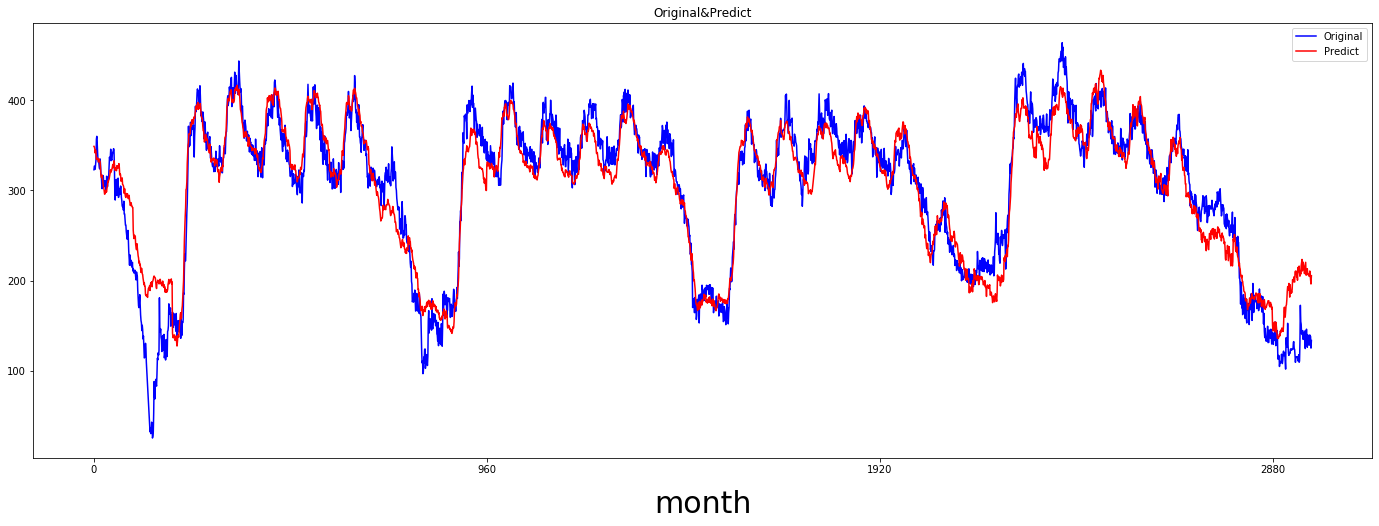

In [161]:
for i in range(12):
#     print(i)
    rmse_T=0
    mape_T=0
    if i == 0:
        preds_T = np.zeros([2304, ])
        
    elif i == 1:
        preds_T = np.zeros([2688, ])
        
    elif (i==3)or(i==5)or(i==8)or(i==10):
        preds_T = np.zeros([2880, ])
        
    else:
        preds_T = np.zeros([2976, ])
        
#     print(preds_T.shape)
    for j in range(5):
        rmse, mape, y_test, preds = xgboo(i+1)
        rmse_T += rmse
        mape_T += mape
        preds_T += preds
    
    print(i+1,'月')
    print("RMSE: %f" % (rmse_T/5))
    print("MAPE: %f" % (mape_T/5))
    
    preds_T = preds_T/5
    
    plt.figure(figsize=(24, 8))
    orig = plt.plot(y_test, color='blue',label='Original')
    predict = plt.plot(preds_T, color='red',label='Predict')
    plt.xlabel("month", fontsize=30, labelpad = 15)
    plt.legend(loc='best')
    plt.xticks(range(0,3000,960))#十天一刻度
    plt.title('Original&Predict')
    plt.show(block=False)

In [4]:
# RMSE: 21.647724
# MAPE: 6.877890

In [50]:
data = pd.read_csv('Dajiang_processed_20200618.csv')
# data

In [49]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'], errors='coerce')
data['Minute'] = data['Date_Time'].dt.minute
# data

In [7]:
# data.loc[data['Date'].isin(['2018/1/1'])]
data = data.set_index(['Date_Time'])
df1 = data.loc['2018-01-01 00:15:00':'2018-03-01 00:00:00']
df2 = data.loc['2018-03-25 00:15:00':'2019-01-01 00:00:00']
df3 = data.loc['2018-02-22 00:15:00':'2018-04-01 00:00:00']

In [8]:
# i=0
# df1.iloc[671+i:767+i, :]
# df1.iloc[0:671, :]
# l = len(df1)
# l1
# df3

In [9]:
df1_2 = df1[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure']]
df1_2_forcast = df1[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure', 'Hour', 'Minute']]

df4_12 = df2[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure']]
df4_12_forcast = df2[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure', 'Hour', 'Minute']]

df_3 = df3[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure']]
df_3_forcast = df3[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Measure', 'Hour', 'Minute']]

In [10]:
# df4_12_forcast

In [11]:
#normalization
dfs_max = 515.6
normalized_dfs1_2 = df1_2 / dfs_max
nor_df1_2_forcast = df1_2_forcast / dfs_max

normalized_df4_12 = df4_12 / dfs_max
nor_df4_12_forcast = df4_12_forcast / dfs_max

normalized_df_3 = df_3 / dfs_max
nor_df_3_forcast = df_3_forcast / dfs_max

In [12]:
# normalized_df_3

In [13]:
# normalized_df4_12

In [14]:
dfs_X1 = nor_df1_2_forcast[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Hour', 'Minute']]
dfs_y1 = nor_df1_2_forcast[['Measure']]

dfs_X2 = nor_df4_12_forcast[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Hour', 'Minute']]
dfs_y2 = nor_df4_12_forcast[['Measure']]

dfs_TX = nor_df_3_forcast[['Period_Transform', 'Temp_H', 'A', 'B', 'IsHoliday', 'Hour', 'Minute']]
dfs_Ty = nor_df_3_forcast[['Measure']]

In [15]:
normalized_dfs1_2 = normalized_dfs1_2.reset_index(drop=True)
normalized_df4_12 = normalized_df4_12.reset_index(drop=True)
normalized_df_3 = normalized_df_3.reset_index(drop=True)

dfs_X1 = dfs_X1.reset_index(drop=True)
dfs_y1 = dfs_y1.reset_index(drop=True)

dfs_X2 = dfs_X2.reset_index(drop=True)
dfs_y2 = dfs_y2.reset_index(drop=True)

dfs_TX = dfs_TX.reset_index(drop=True)
dfs_Ty = dfs_Ty.reset_index(drop=True)

In [16]:
# normalized_df_3

In [17]:
# dfs_Ty

In [18]:
X1 = []
end = len(normalized_dfs1_2)-672
for i in range(0,end,96):
    period_7 = normalized_dfs1_2.iloc[i:672+i, :].to_numpy()
    forcast_info = dfs_X1.iloc[671+i:767+i, :].to_numpy()
    
    period_7_2d = np.reshape(period_7, (-1))
    forcast_info_2d = np.reshape(forcast_info, (-1))
    
    r = np.concatenate([period_7_2d, forcast_info_2d])
    X1.append(r.flatten())
    
X1 = np.array(X1)

X2 = []
end = len(normalized_df4_12)-672
for i in range(0,end,96):
    period_7 = normalized_df4_12.iloc[i:672+i, :].to_numpy()
    forcast_info = dfs_X2.iloc[671+i:767+i, :].to_numpy()
    
    period_7_2d = np.reshape(period_7, (-1))
    forcast_info_2d = np.reshape(forcast_info, (-1))
    
    r = np.concatenate([period_7_2d, forcast_info_2d])
    X2.append(r.flatten())
    
X2 = np.array(X2)

X = np.concatenate([X1, X2])

In [19]:
# X.shape

In [20]:
y1 = []
end = len(normalized_dfs1_2)-672
for i in range(0,end,96):
    forcast_info = dfs_y1.iloc[671+i:767+i, :].to_numpy()
    
    forcast_info_2d = np.reshape(forcast_info, (-1))
    
    y1.append(forcast_info_2d.flatten())
    
y1 = np.array(y1)

y2 = []
end = len(normalized_df4_12)-672
for i in range(0,end,96):
    forcast_info = dfs_y2.iloc[671+i:767+i, :].to_numpy()
    
    forcast_info_2d = np.reshape(forcast_info, (-1))
    
    y2.append(forcast_info_2d.flatten())
    
y2 = np.array(y2)

y = np.concatenate([y1, y2])

In [21]:
# y.shape

In [22]:
TX = []
end = len(normalized_df_3)-672
for i in range(0,end,96):
    period_7 = normalized_df_3.iloc[i:672+i, :].to_numpy()
    forcast_info = dfs_TX.iloc[671+i:767+i, :].to_numpy()
    
    period_7_2d = np.reshape(period_7, (-1))
    forcast_info_2d = np.reshape(forcast_info, (-1))
    
    r = np.concatenate([period_7_2d, forcast_info_2d])
    TX.append(r.flatten())
    
TX = np.array(TX)

In [23]:
# TX.shape

In [24]:
Ty = []
end = len(normalized_df_3)-672
for i in range(0,end,96):
    forcast_info = dfs_Ty.iloc[671+i:767+i, :].to_numpy()
    
    forcast_info_2d = np.reshape(forcast_info, (-1))
    
    Ty.append(forcast_info_2d.flatten())
    
Ty = np.array(Ty)

In [25]:
# Ty.shape

In [26]:
# end = 3647-671
# end/96

In [140]:
X_train = X
y_train = y

X_test = TX
y_test = Ty

In [28]:
xg_reg = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:squarederror', booster = 'gblinear',
                          reg_lambda = 0.000001, learning_rate = 0.002, n_estimators = 4200))

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

C:\Users\IDSL\anaconda3\lib\site-packages\xgboost\core.py:444: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [141]:
y_test = y_test * dfs_max
preds = preds * dfs_max

In [145]:
y_test.shape

(31, 96)

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
mape = np.mean(np.abs((preds - y_test) / y_test)) * 100
print("MAPE: %f" % (mape))

RMSE: 21.617088
MAPE: 6.871693


In [134]:
y_test=y_test.flatten()
preds=preds.flatten()

In [135]:
y_test

array([239.7, 246.4, 243. , ..., 243.9, 248.7, 243.3])

In [138]:
y_test.shape

(2976,)

In [148]:
a=np.zeros([2304,])
print(a.shape)
a+y_test

(2304,)


array([130.4, 146.6, 144.3, ..., 244.9, 253.8, 242.1])

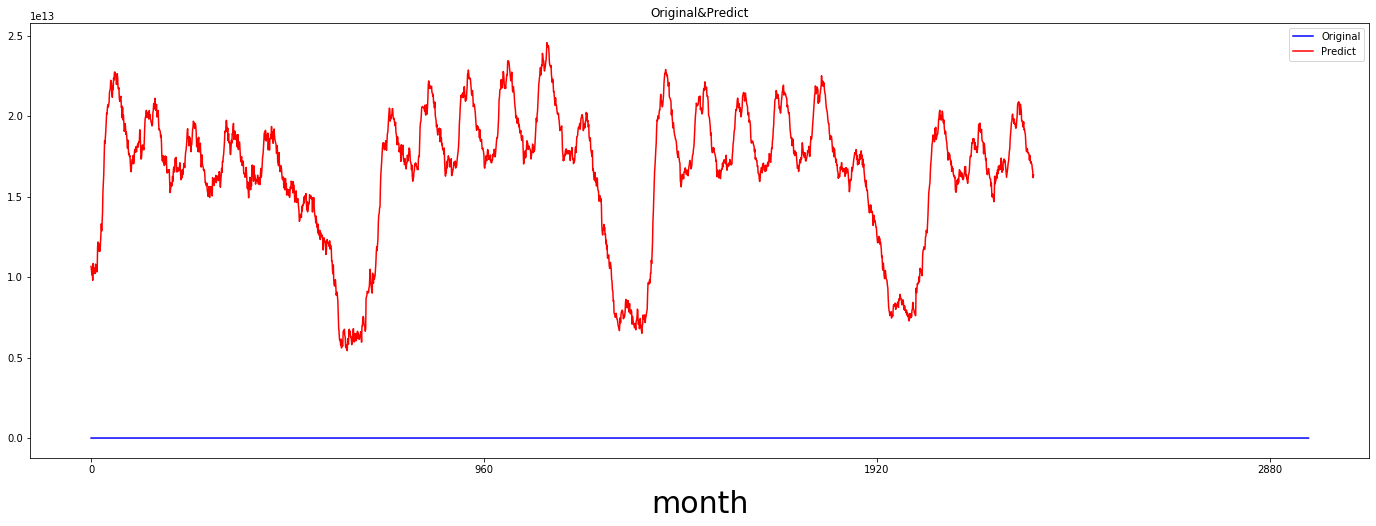

In [113]:
plt.figure(figsize=(24, 8))   
orig = plt.plot(y_test, color='blue',label='Original')
predict = plt.plot(preds, color='red',label='Predict')
plt.xlabel("month", fontsize=30, labelpad = 15)
plt.legend(loc='best')
plt.title('Original&Predict')
plt.xticks(range(0,3000,960))#十天一刻度
plt.show(block=False)

In [34]:
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: %f" % (rmse))
# mape = np.mean(np.abs((preds - y_test) / y_test)) * 100
# print("MAPE: %f" % (mape))